In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
np.random.seed(22)

## Prepare Toy Dataset

#### Use equation: 2*x1 + 5

In [32]:
x1 = np.random.randn(1000) 
y = 2 * x1 + 5 + np.random.randn(1000) * 0.9

In [33]:
df = pd.DataFrame({"x1": x1,
                  "y1": y})
print(df.shape)
df.head()

(1000, 2)


,x1,y1
0,0.401379,6.991158
1,-0.999815,4.144995
2,0.043209,4.906988
3,-1.187357,2.872156
4,1.151496,7.819742


## Plot the graph

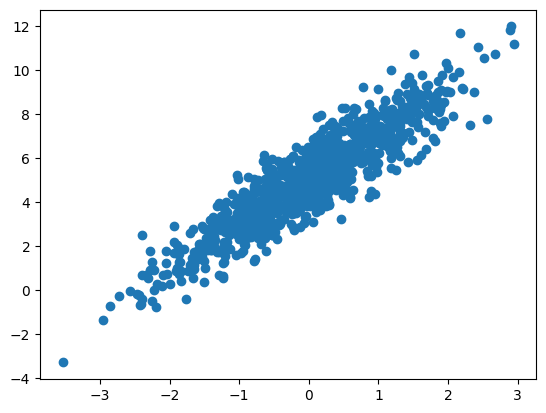

In [34]:
plt.scatter(x1, y)

In [35]:
def scale(d):
    mean = d.mean()
    std = d.std()
    return (d - mean)/std


def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    ## The examples are read at random, in no particular order
    np.random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
        
        yield features[batch_indices], labels[batch_indices]

## Get Features and Labels with scaling in place

In [39]:
features = scale(
    np.reshape(np.array(df.iloc[:,0]), (len(df), 1))
)

labels = scale(
np.reshape(np.array(df.iloc[:, 1]), (len(df), 1)))

## Plot the data for Exploration

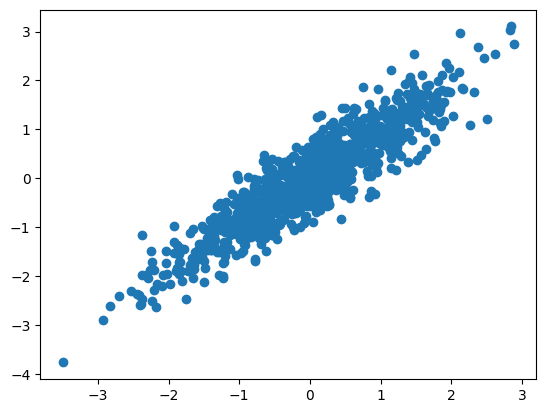

In [40]:
plt.scatter(features, labels)
plt.show()

In [41]:
class LinearRegression:
    def __init__(self, X, y, W, b):
        self.X = X
        self.y = y
        self.W = W
        self.b = b
        self.y_pred = self.LinearModel()
        
    def LinearModel(self):
        return np.dot(self.X, self.W) + self.b
    
    def mse_loss(self, y, y_pred):
        return np.mean(sum(np.square(y - y_pred))) / 2
    
    ## Change the value of batch size for batch and stochastic
    def train(self, num_epochs = 10, batch_size = 10):
        # Training
        for epoch in range(num_epochs):
            for X, y in data_iter(batch_size, self.X, self.y):
                y_pred = self.predict(X)
                
                error = (y - y_pred)
                
                # Update parameters using their gradient
                grad_W = np.sum(error.T.dot(X))
                grad_b = np.sum((y - y_pred))
                
                # Set the update rule
                self.W = self.W + (1/batch_size * lr * grad_W)
                self.b = self.b + (1/batch_size * lr * grad_b)
            
            y_pred = self.predict(X)
            final_loss = self.mse_loss(y, y_pred)/ batch_size
            print(f'epoch {epoch + 1}, loss {float(final_loss): f}')
            
    def predict(self, X):
        return np.dot(X, self.W) + self.b

In [42]:
np.random.seed(20)
lr = 0.0001
num_epochs = 50
batch_size = 100

In [43]:
W = np.random.normal(1, 0.001, size = (1, 1))
b = np.zeros(1)
linear_regression_model = LinearRegression(features, labels, W, b)

## Train the model

In [46]:
linear_regression_model.train(num_epochs = num_epochs, batch_size = batch_size)

epoch 1, loss  0.060305
epoch 2, loss  0.099446
epoch 3, loss  0.096562
epoch 4, loss  0.102188
epoch 5, loss  0.076639
epoch 6, loss  0.088850
epoch 7, loss  0.092018
epoch 8, loss  0.103384
epoch 9, loss  0.078041
epoch 10, loss  0.078018
epoch 11, loss  0.082869
epoch 12, loss  0.074656
epoch 13, loss  0.070597
epoch 14, loss  0.099387
epoch 15, loss  0.100566
epoch 16, loss  0.095868
epoch 17, loss  0.101395
epoch 18, loss  0.087346
epoch 19, loss  0.083278
epoch 20, loss  0.089114
epoch 21, loss  0.103541
epoch 22, loss  0.085831
epoch 23, loss  0.067078
epoch 24, loss  0.079956
epoch 25, loss  0.075937
epoch 26, loss  0.080226
epoch 27, loss  0.094781
epoch 28, loss  0.070493
epoch 29, loss  0.078825
epoch 30, loss  0.063586
epoch 31, loss  0.072197
epoch 32, loss  0.066981
epoch 33, loss  0.069494
epoch 34, loss  0.093572
epoch 35, loss  0.074720
epoch 36, loss  0.056024
epoch 37, loss  0.097361
epoch 38, loss  0.074166
epoch 39, loss  0.084801
epoch 40, loss  0.069503
epoch 41,